In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import joblib
from sklearn.utils import shuffle


In [2]:
sns.set_theme(style='white')
sns.set_palette('bright')
sns.set_context("talk")
sns.set_style("darkgrid")

In [4]:
chapitres_tokens = joblib.load('/home/crazyjeannot/Documents/doctorat/data/data_chapitres/lemmatizers/fall_2023/main_list_tokens_stanza_sentences_chapitres.pkl')
chapitres_index = joblib.load('/home/crazyjeannot/Documents/doctorat/data/data_chapitres/lemmatizers/fall_2023/main_list_index_stanza_sentences_chapitres.pkl')

In [33]:
def plot_sentences_per_5_years(sentences_list, index_list):
    # Create a DataFrame to store the data
    data = {'Year': [], 'Sentences Count': [], 'Novel': []}

    # Extract year from the novel name and count sentences
    for novel_sentences, novel_name in zip(sentences_list, index_list):
        year_str = novel_name.split('_')[0]
        try:
            year = int(year_str)
        except ValueError:
            # Handle cases where the year is not a valid integer
            continue

        # Count sentences per novel
        sentences_count = len(novel_sentences)

        # Append data to the DataFrame
        data['Year'].append(year)
        data['Sentences Count'].append(sentences_count)
        data['Novel'].append(novel_name)

    # Create a DataFrame from the collected data
    df = pd.DataFrame(data)

    # Create a new column with the year rounded to the nearest 5 years
    df['Year_Rounded'] = df['Year'] // 5 * 5

    # Group by the rounded year and sum the sentences count
    grouped_data = df.groupby('Year_Rounded')['Sentences Count'].sum().reset_index()

    # Plot using Seaborn
    plt.figure(figsize=(12, 6))
    plot = sns.barplot(x='Year_Rounded', y='Sentences Count', data=grouped_data)
    plt.xticks(rotation=90)
    plot.set(xlabel='Years', ylabel='# Sentences')#, title='Sentences Count per 5 Years')
    plt.savefig('img/chapitres_sentences_per_year.png', dpi=300, bbox_inches='tight')
    plt.show()



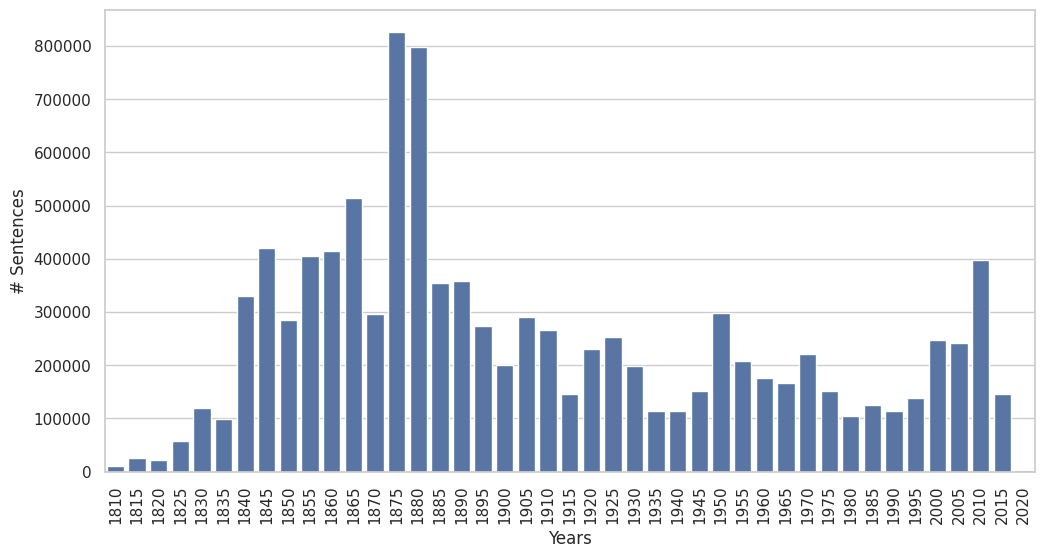

In [34]:
plot_sentences_per_5_years(chapitres_tokens, chapitres_index)

In [22]:
def count_tokens(sentence_list):
    # Assuming each element in sentence_list is a list of tokens
    return [len(tokens) for tokens in sentence_list]

In [31]:
def plot_tokens_per_5_years(sentences_list, index_list, min_xticks=10):
    # Create a DataFrame to store the data
    data = {'Year': [], 'Tokens Count': [], 'Novel': []}

    # Extract year from the novel name and count tokens
    for novel_sentences, novel_name in zip(sentences_list, index_list):
        year_str = novel_name.split('_')[0]
        try:
            year = int(year_str)
        except ValueError:
            # Handle cases where the year is not a valid integer
            continue

        # Count tokens per novel
        tokens_count = sum(count_tokens(novel_sentences))

        # Append data to the DataFrame
        data['Year'].append(year)
        data['Tokens Count'].append(tokens_count)
        data['Novel'].append(novel_name)

    # Create a DataFrame from the collected data
    df = pd.DataFrame(data)

    # Create a new column with the year rounded to the nearest 5 years
    df['Year_Rounded'] = df['Year'] // 5 * 5

    # Group by the rounded year and sum the tokens count
    grouped_data = df.groupby('Year_Rounded')['Tokens Count'].sum().reset_index()

    # Plot using Seaborn
    plt.figure(figsize=(12, 6))
    plot = sns.barplot(x='Year_Rounded', y='Tokens Count', data=grouped_data)

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90)
    #x_ticks = grouped_data['Year_Rounded'].unique()
    #step = max(1, len(x_ticks) // min_xticks)
    #plt.xticks(x_ticks[::step])
    
    plot.set(xlabel='Years', ylabel='# Tokens')#, title='Tokens Count per 5 Years')
    plt.savefig('img/chapitres_tokens_per_year.png', dpi=300, bbox_inches='tight')

    plt.show()


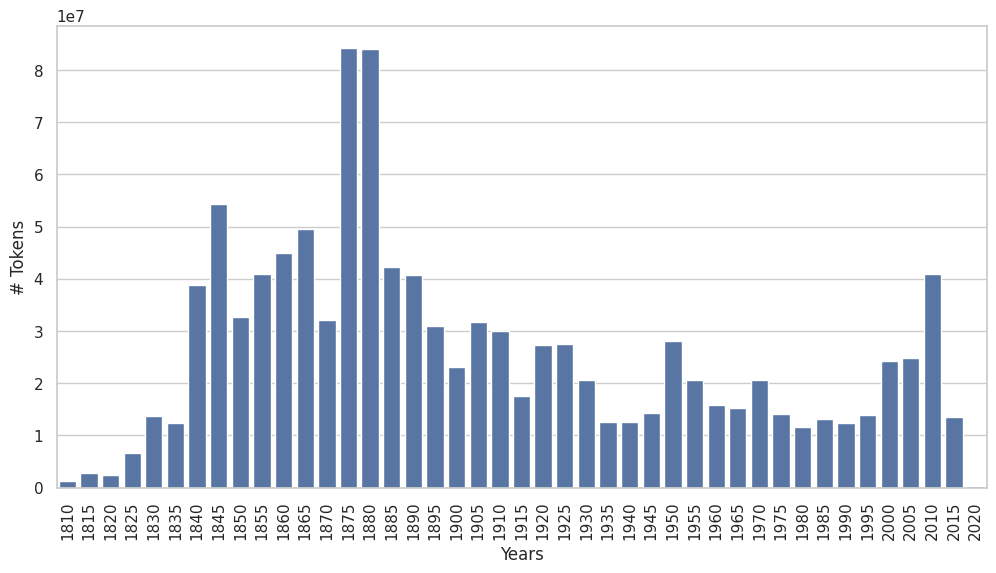

In [32]:
plot_tokens_per_5_years(chapitres_tokens, chapitres_index)

In [14]:
df_corpus

,date,auteur,titre,fabula,genre,Year
doc_name,,,,,,
1861_Segur-comtesse-de_Pauvre-Blaise,1861,comtesse de segur,pauvre blaise,False,littérature jeunesse,NaN
1845_Sand-George_Teverino,1845,george sand,teverino,True,NaN,NaN
1892_Allais-Alphonse_Vive-la-vie,1892,alphonse allais,vive la vie,False,nouvelles,NaN
1997_Bergounioux-Pierre_La-ligne,1997,pierre bergounioux,la ligne,True,NaN,NaN
1894_Rachilde_Le-Demon-de-l-Absurde,1894,rachilde,le demon de l absurde,False,fantastique,NaN
...,...,...,...,...,...,...
1960_Simenon-Georges_Maigret-et-les-vieillards,1960,georges simenon,maigret et les vieillards,True,policier,NaN
1910_Zevaco-Michel_Triboulet,1910,michel zevaco,triboulet,False,roman d'aventures,NaN
1880_Gouraud-Julie_Aller-et-retour,1880,julie gouraud,aller et retour,False,littérature jeunesse,NaN


In [4]:
df_corpus = pd.read_csv(r'/home/crazyjeannot/Documents/master/M2/master_thesis/meta_data/corpus.csv')
df_corpus.set_index(['doc_name'], inplace=True)

In [34]:
genres_ok = ["roman d'aventures",
'policier',
'littérature jeunesse',
'mémoires et autobiographie',
'roman sentimental']

In [64]:
def plot_subgenre_distribution(df, good_subgenres=None):

    # Filter rows with specified subgenres
    if good_subgenres:
        df = df[df['genre'].isin(good_subgenres)]

    # Plot using Seaborn
    plt.figure(figsize=(12, 6))
    df.loc[:, 'Year_Rounded'] = df['date'] // 5 * 5

    grouped_data = df.groupby(['Year_Rounded', 'genre']).size().reset_index(name='Novel Count')

    custom_palette = sns.color_palette("Set1", len(good_subgenres))
    # Plot using Seaborn lineplot
    plt.figure(figsize=(12, 6))
    plot = sns.lineplot(x='Year_Rounded', y='Novel Count', hue='genre', data=grouped_data, marker='o', palette=custom_palette)

    plot.set(xlabel='Year_Rounded', ylabel='Number of Novels')
    plt.legend(title='Subgenre', loc='upper left', bbox_to_anchor=(1, 1))

    plt.savefig('img/subgenres_evolution_chapitres.png', dpi=300, bbox_inches='tight')
    plt.show()
    

/tmp/ipykernel_127532/2170354360.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Year_Rounded'] = df['date'] // 5 * 5


<Figure size 1200x600 with 0 Axes>

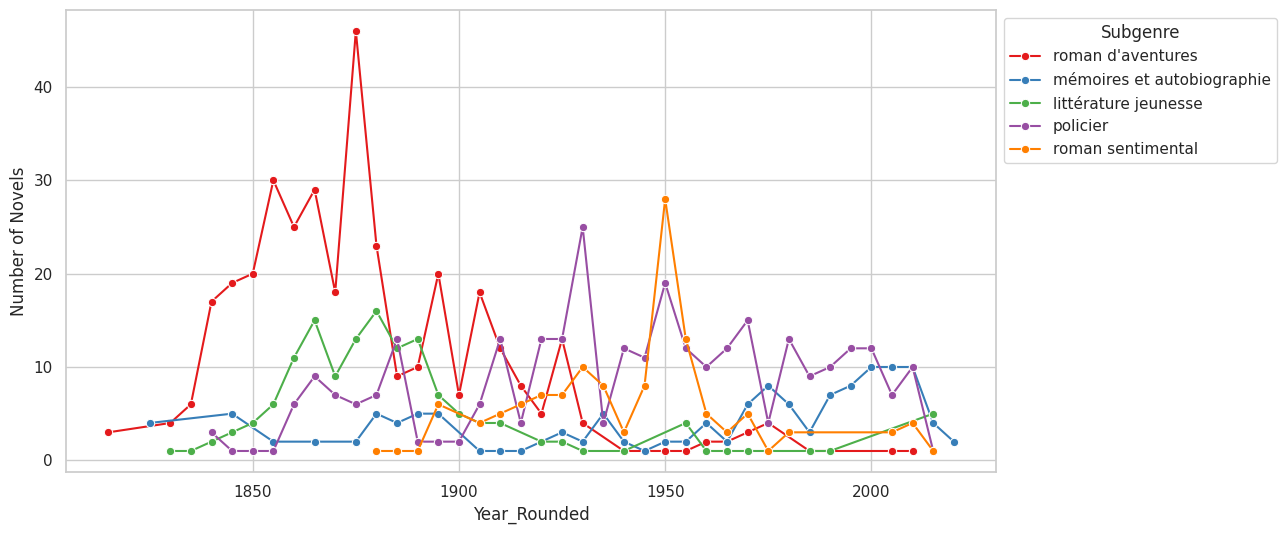

In [63]:
plot_subgenre_distribution(df_corpus, genres_ok)

In [45]:
def balance_dataframe(df, subgenre_column, N):
    # Count the occurrences of each subgenre
    subgenre_counts = df[subgenre_column].value_counts()
    
    # Determine the minimum count among all subgenres
    min_count = N
    
    # Create an empty DataFrame to store the balanced samples
    balanced_df = pd.DataFrame()
    
    # Iterate over each subgenre
    for i, subgenre in enumerate(subgenre_counts.index):
        # Sample `min_count` number of rows for each subgenre
        sampled_rows = df[df[subgenre_column] == subgenre].sample(n=min(min_count, subgenre_counts.values[i]), random_state=42)
        
        # Append the sampled rows to the balanced DataFrame
        balanced_df = pd.concat([balanced_df, sampled_rows])
    
    return shuffle(balanced_df)

In [59]:
df_balanced = balance_dataframe(df_corpus, 'genre', 130)

/tmp/ipykernel_127532/2929965900.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Year_Rounded'] = df['date'] // 5 * 5


<Figure size 1200x600 with 0 Axes>

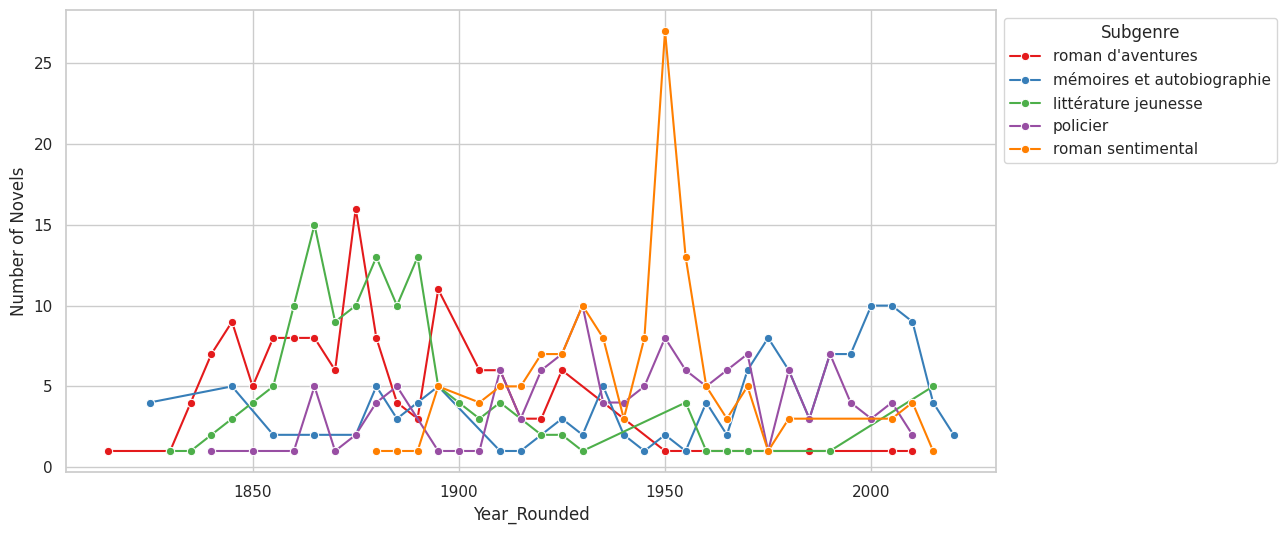

In [65]:
plot_subgenre_distribution(df_balanced, genres_ok)